# <center> Mask Detection </center>

![title](https://media.gq-magazine.co.uk/photos/5f806d443af8763f3d70507f/16:9/w_1920,c_limit/20201009-mask.jpg)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import cv2
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

Using TensorFlow backend.


In [3]:
model =Sequential([Conv2D(100, (3,3), activation='relu', input_shape=(224,224,3)),
                   MaxPooling2D(2,2),
                   Conv2D(100, (3,3), activation='relu'),
                   MaxPooling2D(2,2),
                   Flatten(),
                   Dropout(0.5),
                   Dense(50, activation='relu'),
                   Dense(2, activation='softmax')
                  ])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [5]:
TRAINING_DIR = "./dataset/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(224, 224))

Found 2805 images belonging to 2 classes.


In [6]:
VALIDATION_DIR = "./dataset/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(224, 224))

Found 1028 images belonging to 2 classes.


In [7]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [8]:
history =  model.fit_generator(train_generator,steps_per_epoch=200,epochs=10, validation_data=validation_generator,validation_steps=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
200/200 [==============================] - 584s 3s/step - loss: 0.5141 - acc: 0.8205 - val_loss: 0.4454 - val_acc: 0.8460
Epoch 2/10
200/200 [==============================] - 570s 3s/step - loss: 0.2701 - acc: 0.8950 - val_loss: 0.4229 - val_acc: 0.8737
Epoch 3/10
200/200 [==============================] - 567s 3s/step - loss: 0.2524 - acc: 0.9090 - val_loss: 0.4492 - val_acc: 0.8236
Epoch 4/10
200/200 [==============================] - 568s 3s/step - loss: 0.2420 - acc: 0.9030 - val_loss: 0.4394 - val_acc: 0.8417
Epoch 5/10
200/200 [==============================] - 588s 3s/step - loss: 0.2249 - acc: 0.9145 - val_loss: 0.4134 - val_acc: 0.8457
Epoch 6/10
200/200 [==============================] - 568s 3s/step - loss: 0.2465 - acc: 0.8985 - val_loss: 0.4666 - val_acc: 0.8086
Epoch 7/10
200/200 [==============================] - 569s 3s/step - loss: 0.2093 - acc: 0.9215 - val_loss: 0.3888 - val_acc: 0.8657
Epoch 8/10
200/200 [=

In [9]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 100)     2800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 100)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 100)     90100     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 291600)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 291600)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                14580050  
__________

In [10]:
# save model and architecture to single file
model.save("model3.h5")
print("Saved model to disk")

Saved model to disk


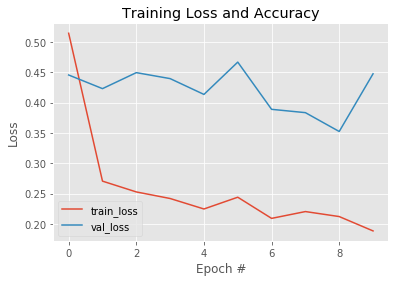

In [11]:
EPOCHS = 10


# plot the training loss
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

## test

In [15]:
classifier = cv2.CascadeClassifier('/home/shri/Desktop/face-mask-detector-project/haarcascade_frontalface_default.xml')

In [16]:
# Read model
model=load_model("model3.h5")

In [18]:

im = cv2.imread('401.jpg')
im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
size = 1

# Resize the image to speed up detection
mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

# detect MultiScale / faces 
faces = classifier.detectMultiScale(mini)

#faces = face_cascade.detectMultiScale(img, 1.3, 5)
#faces = face_cascade.detectMultiScale(gray)
print(faces)

[[ 42 109 242 242]]


Result : Wear mask


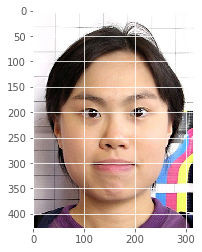

In [20]:
#faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    
    #Save just the rectangle faces in SubRecFaces
    face_img = im[y:y+h, x:x+w]
    
    resized=cv2.resize(face_img,(224,224))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,224,224,3))
    reshaped = np.vstack([reshaped])
    result=model.predict(reshaped)
        
    label=np.argmax(result,axis=1)[0]
    if label == 1:
        print("Result : Wear mask")
    else:
        print("Result : Mask")

plt.imshow(img)
plt.show()


In [24]:

img = cv2.imread('/home/shri/Desktop/face-mask-detector-project/dataset/test/with_mask/with_mask151.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
size = 1

# Resize the image to speed up detection
mini = cv2.resize(img, (img.shape[1] // size, img.shape[0] // size))

# detect MultiScale / faces 
faces = classifier.detectMultiScale(mini)

#faces = face_cascade.detectMultiScale(img, 1.3, 5)
#faces = face_cascade.detectMultiScale(gray)
print(faces)

[[ 71 108 308 308]]


Result : Mask


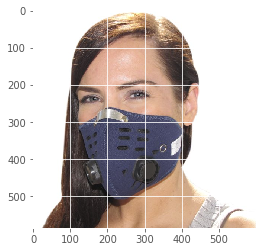

In [25]:
for (x,y,w,h) in faces:
    
    #Save just the rectangle faces in SubRecFaces
    face_img = img[y:y+h, x:x+w]
    resized=cv2.resize(face_img,(224,224))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,224,224,3))
    reshaped = np.vstack([reshaped])
    result=model.predict(reshaped)
        
    label=np.argmax(result,axis=1)[0]
    if label == 1:
        print("Result : Wear mask")
    else:
        print("Result : Mask")

plt.imshow(img)
plt.show()


![title](https://static.toiimg.com/photo/74999272.cms)